In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [80]:
data = pd.read_csv('./datasets/Ames_Housing_Data.csv')
with open('./datasets/Ames_Housing_Feature_Description.txt')as f:
    data_description = f.read()

In [81]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Explore Dataset features

In [82]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [83]:
data.isnull().sum(axis=0)


PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [84]:
def missing_percentage(data):
    perc = data.isna().sum() / len(data) * 100
    perc = perc[(perc > 0)].sort_values()
    return perc

In [85]:
nans = missing_percentage(data)

In [86]:
nans

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [87]:
target = data['SalePrice']

In [88]:
data.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: ylabel='Overall Qual'>

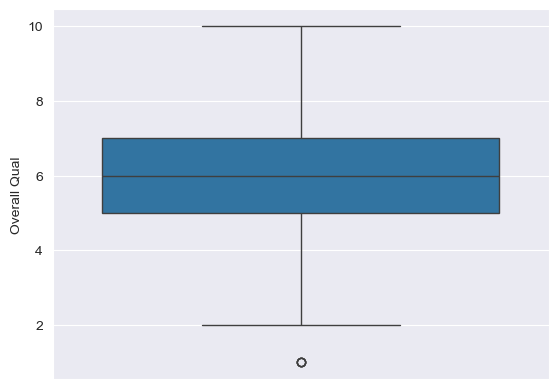

In [89]:
sns.boxplot(data['Overall Qual']) #check if there is an outlier within Overall qual feature

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

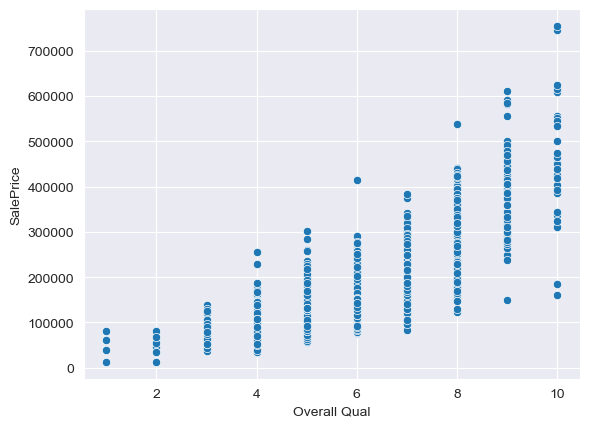

In [90]:
sns.scatterplot(data=data,x='Overall Qual',y='SalePrice')

In [91]:
# check reason of outliers 
# before deals with missing or outliers must take a copy 
df = data.copy()

In [92]:
over_qua_index = df[(df['Overall Qual'] > 8 ) & (df['SalePrice'] < 200000)].index

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

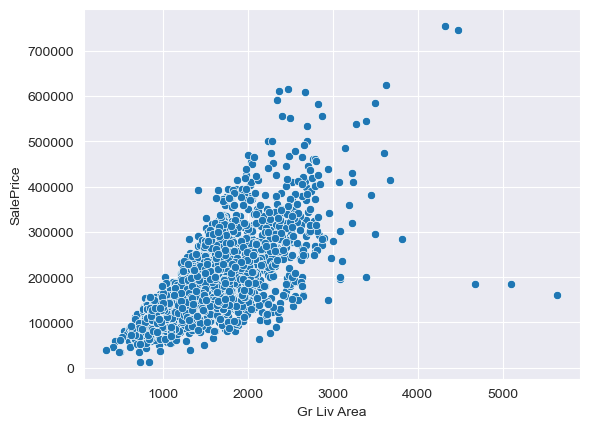

In [93]:
#check the next corr in the df related to SalePrice Feature
sns.scatterplot(data=df,y='SalePrice',x='Gr Liv Area')


In [94]:
#get outliers indexes of gr liv area 
gr_out_indexes = df[(df['Gr Liv Area'] > 4500)&(df['SalePrice'] < 200000)].index

In [95]:
print(over_qua_index,gr_out_indexes)

Index([1182, 1498, 2180, 2181], dtype='int64') Index([1498, 2180, 2181], dtype='int64')


In [96]:
df.drop(gr_out_indexes,inplace=True)

In [97]:
#check outliers 
df[(df['Gr Liv Area'] > 4500)&(df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


## Missing Values

In [98]:
#now deals with missing values
def display_nans(nans_features,palette='Dark2'):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(x=nans_features.index,y = nans_features,hue=nans_features,palette=palette)
    plt.title("Nans Features")
    plt.xticks(rotation=90)
    plt.legend(loc=(1,0))

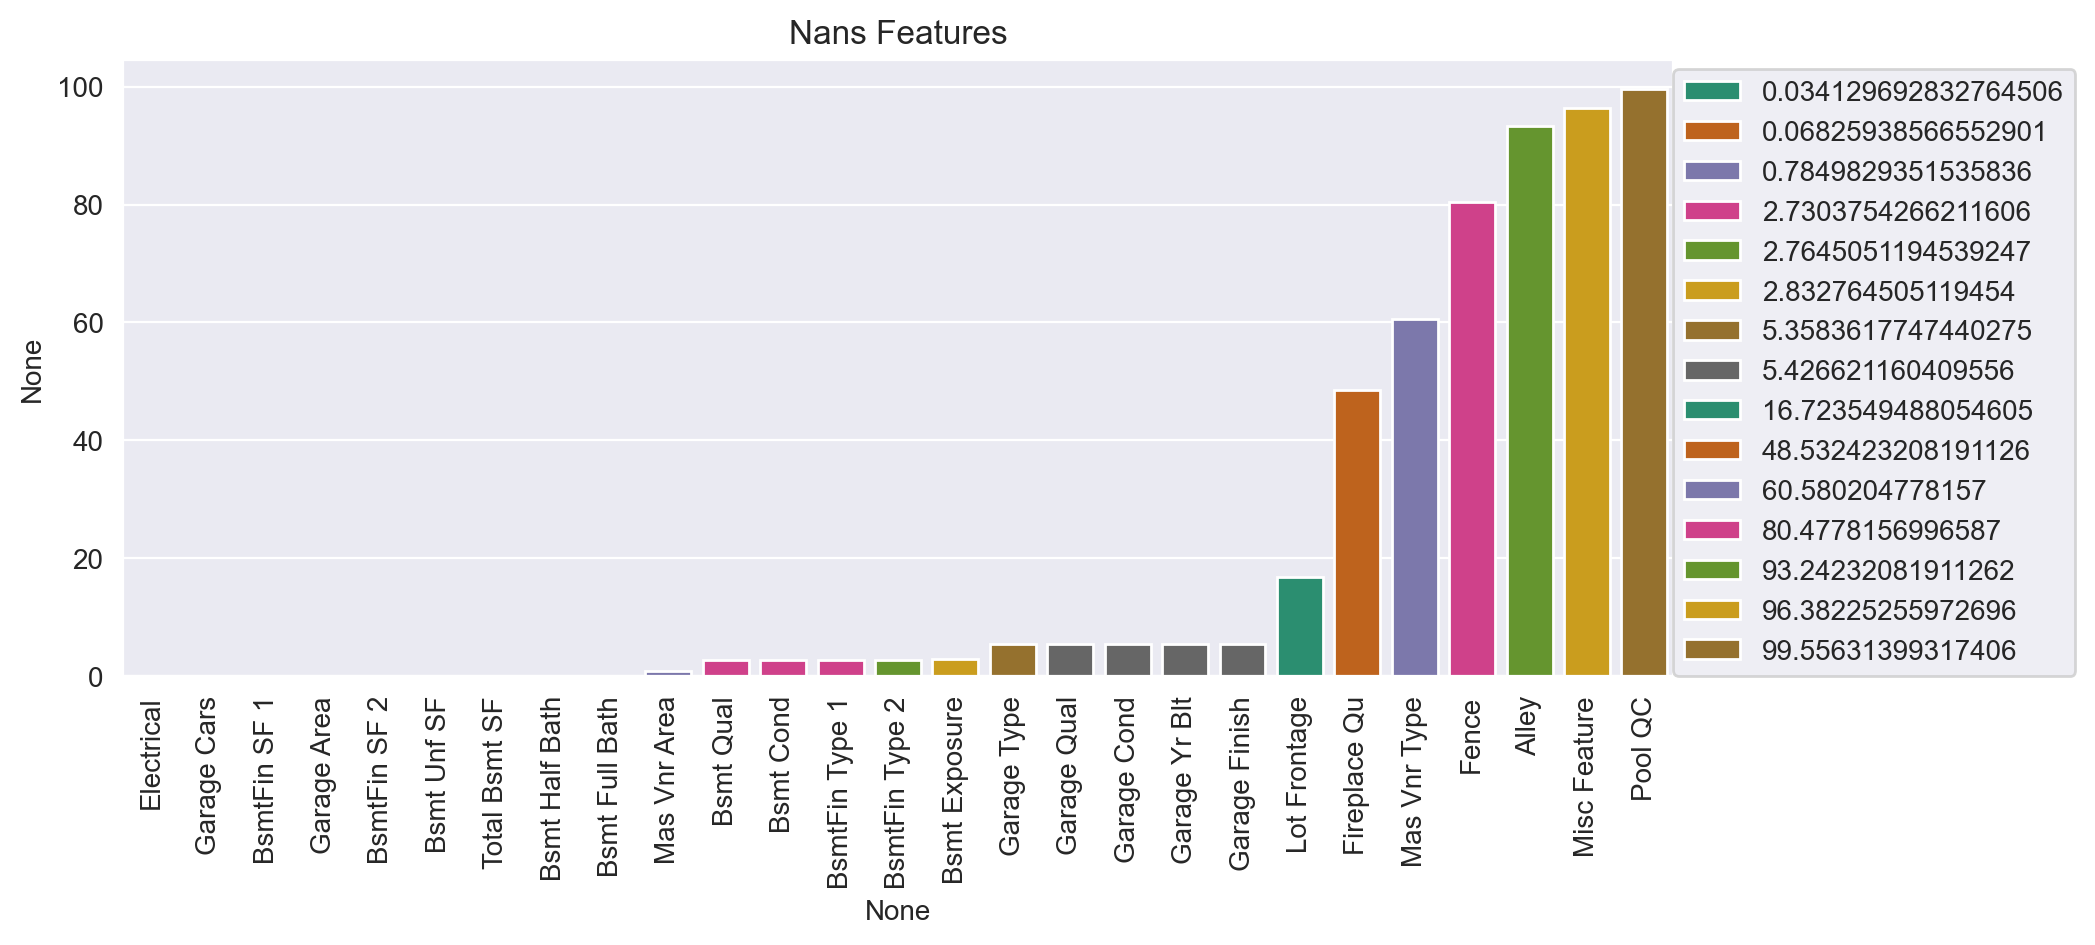

In [99]:
display_nans(nans)

In [100]:
#take in account before drop na must be less than 10% of the data 
df = df.dropna(axis=0,subset=['Electrical','Garage Area'])

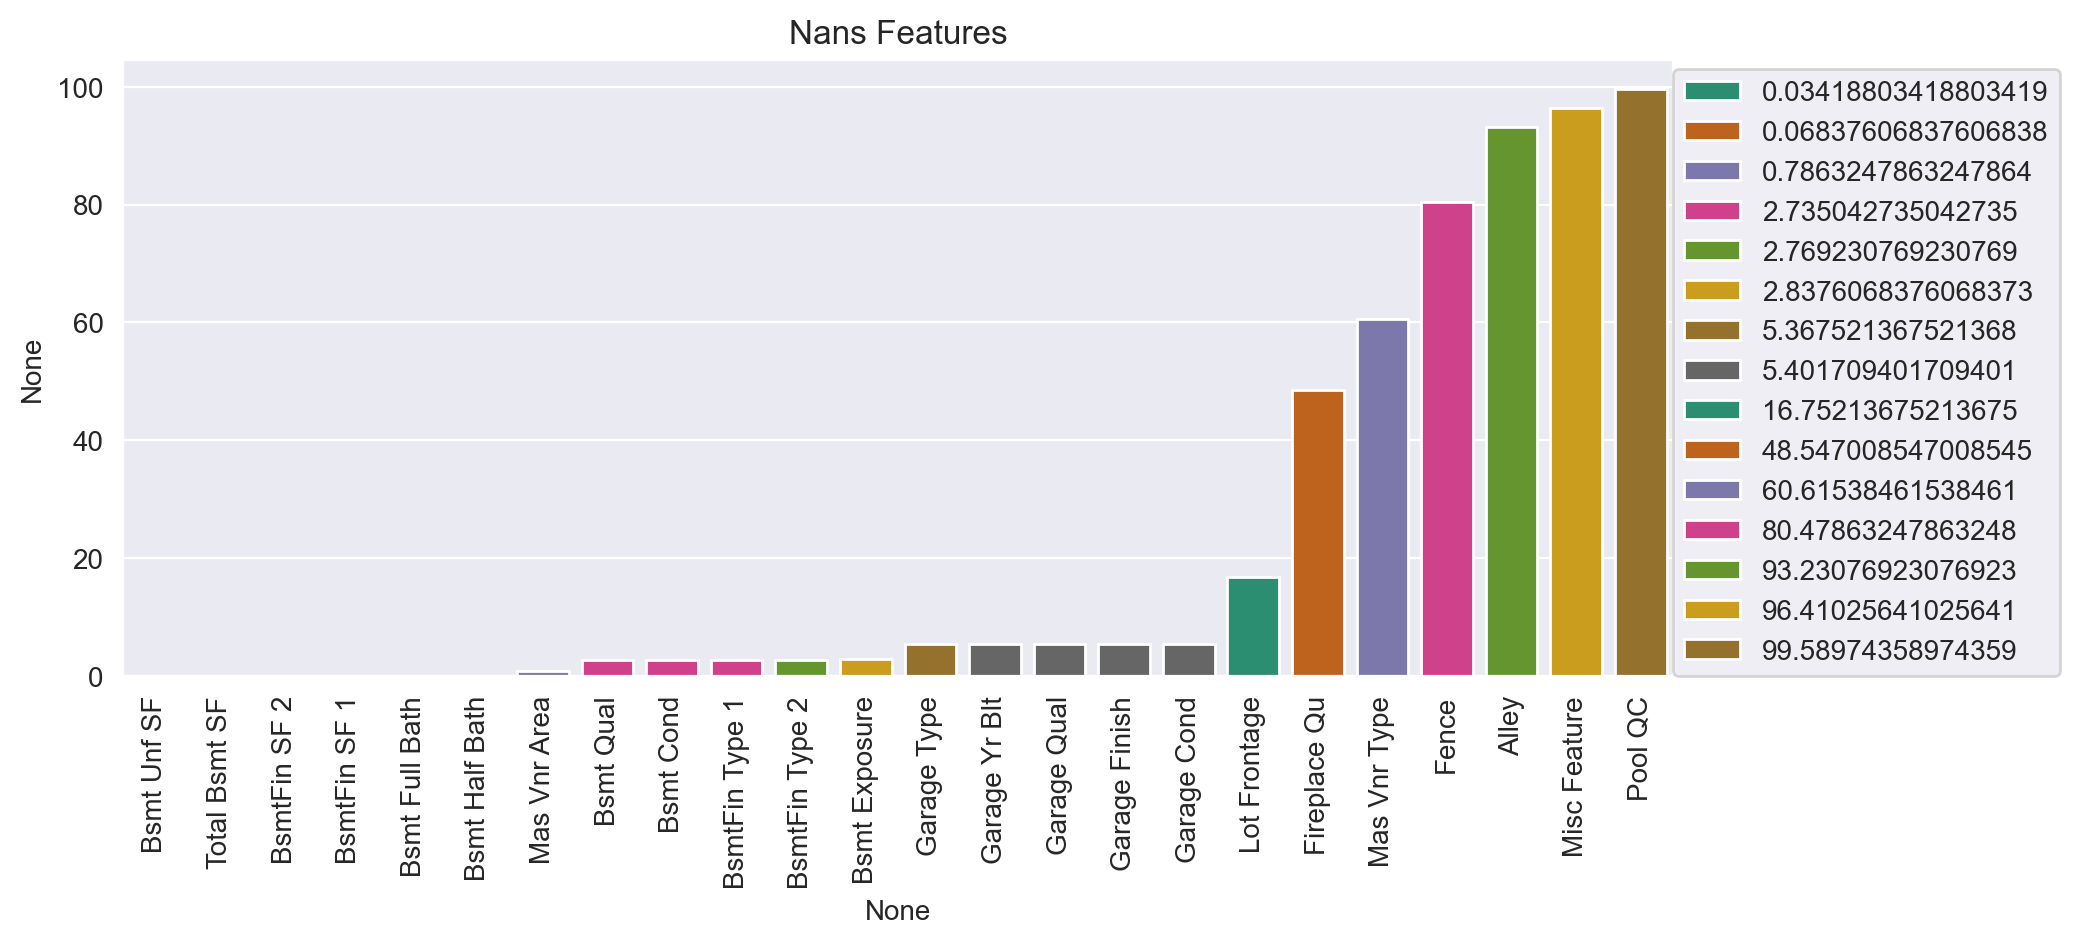

In [101]:
nans = missing_percentage(df)
display_nans(nans)

In [102]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [103]:
nans[nans < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

In [104]:
df[(df['Bsmt Unf SF'].isna())]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [105]:
df[(df['BsmtFin SF 2'].isna())]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [109]:
#basement is there is two types one is numeric and the second is string 
#after read the documentation when numeric basement is na and type is NAN, so it means it has no basement so instead of drop fill it
num_bsmt = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
str_bsmt = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2'] 
df[num_bsmt] = df[num_bsmt].fillna(0)
df[str_bsmt] = df[str_bsmt].fillna('None')

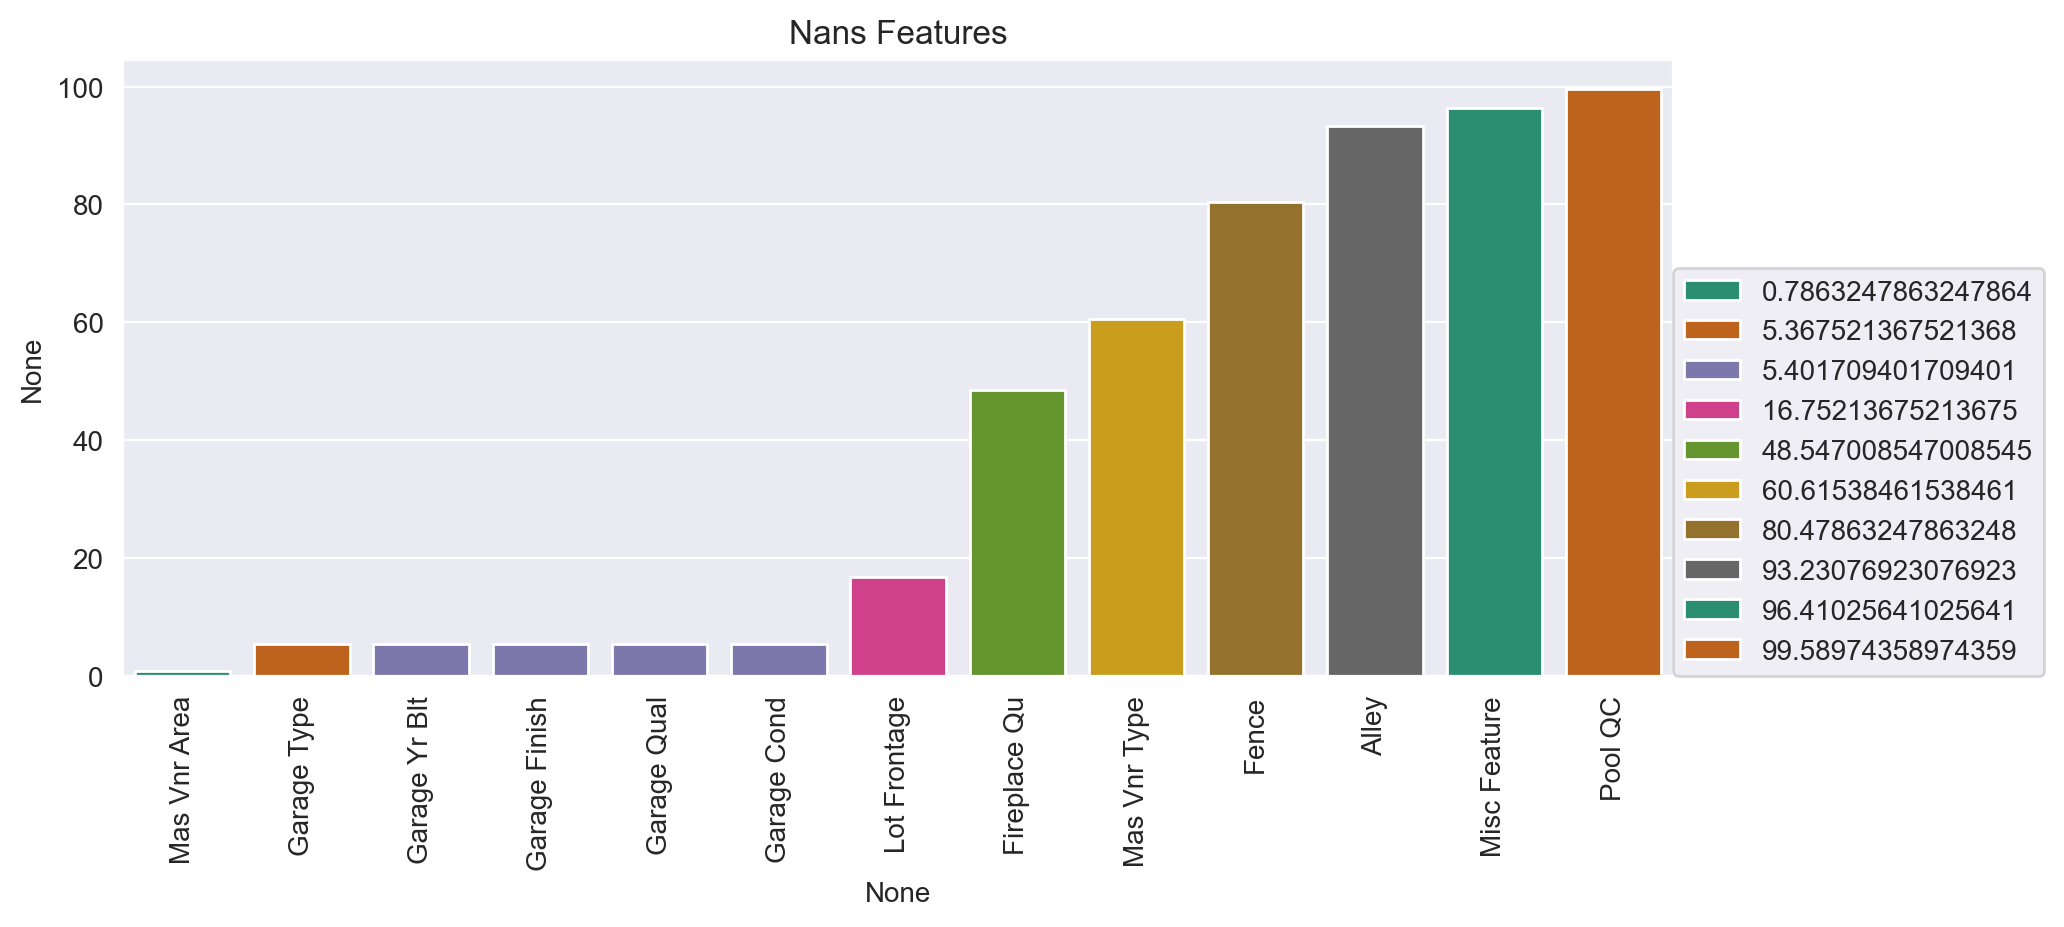

In [110]:
nans = missing_percentage(df)
display_nans(nans)


In [111]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [116]:
# Mas Vnr Type is a str and when it nan it means it None there is not a type relevant 
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
# if Mas Vnr Area is nan then it means 0 
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

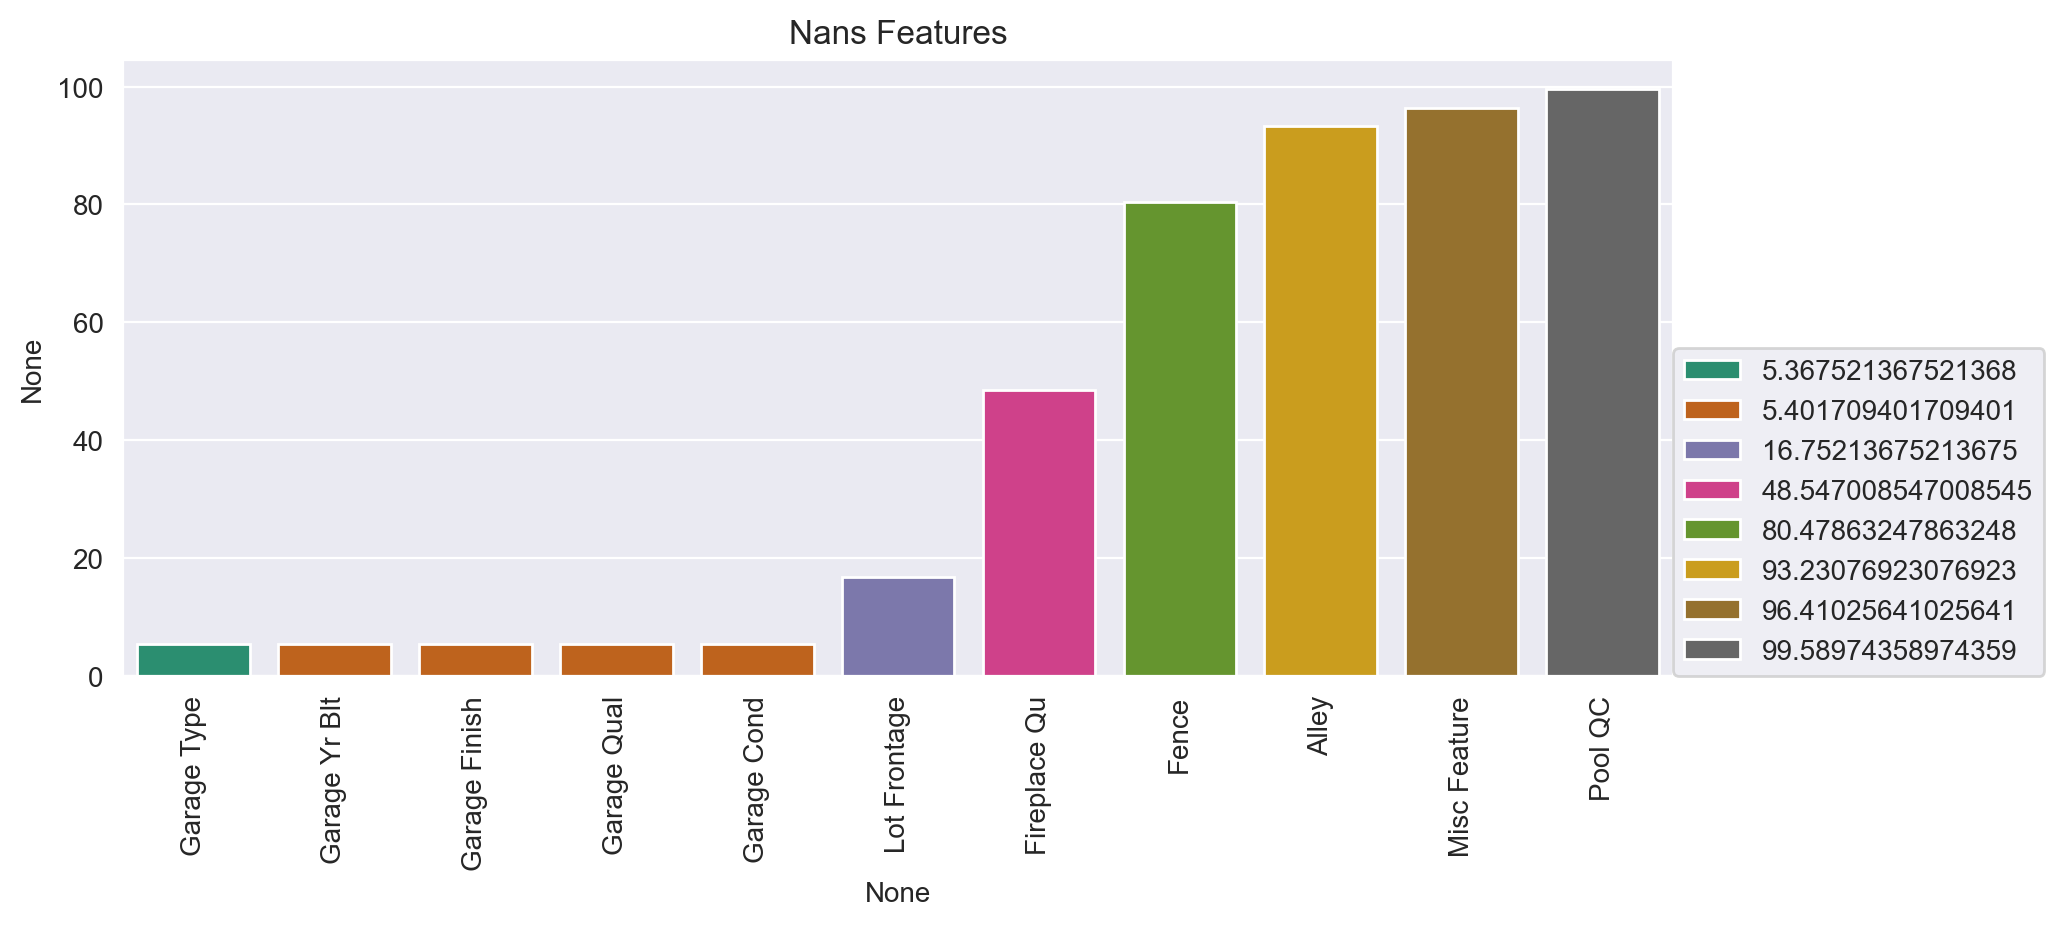

In [117]:
nans = missing_percentage(df)
display_nans(nans)

In [118]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [119]:
garage_str_cols = ['Garage Type','Garage Finish','Garage Cond','Garage Qual']
df[garage_str_cols] = df[garage_str_cols].fillna('None')#when those cols are nan ,so it means there is none a garage exist

In [120]:
garage_num_cols = ['Garage Yr Blt']
df[garage_num_cols] = df[garage_num_cols].fillna(0)

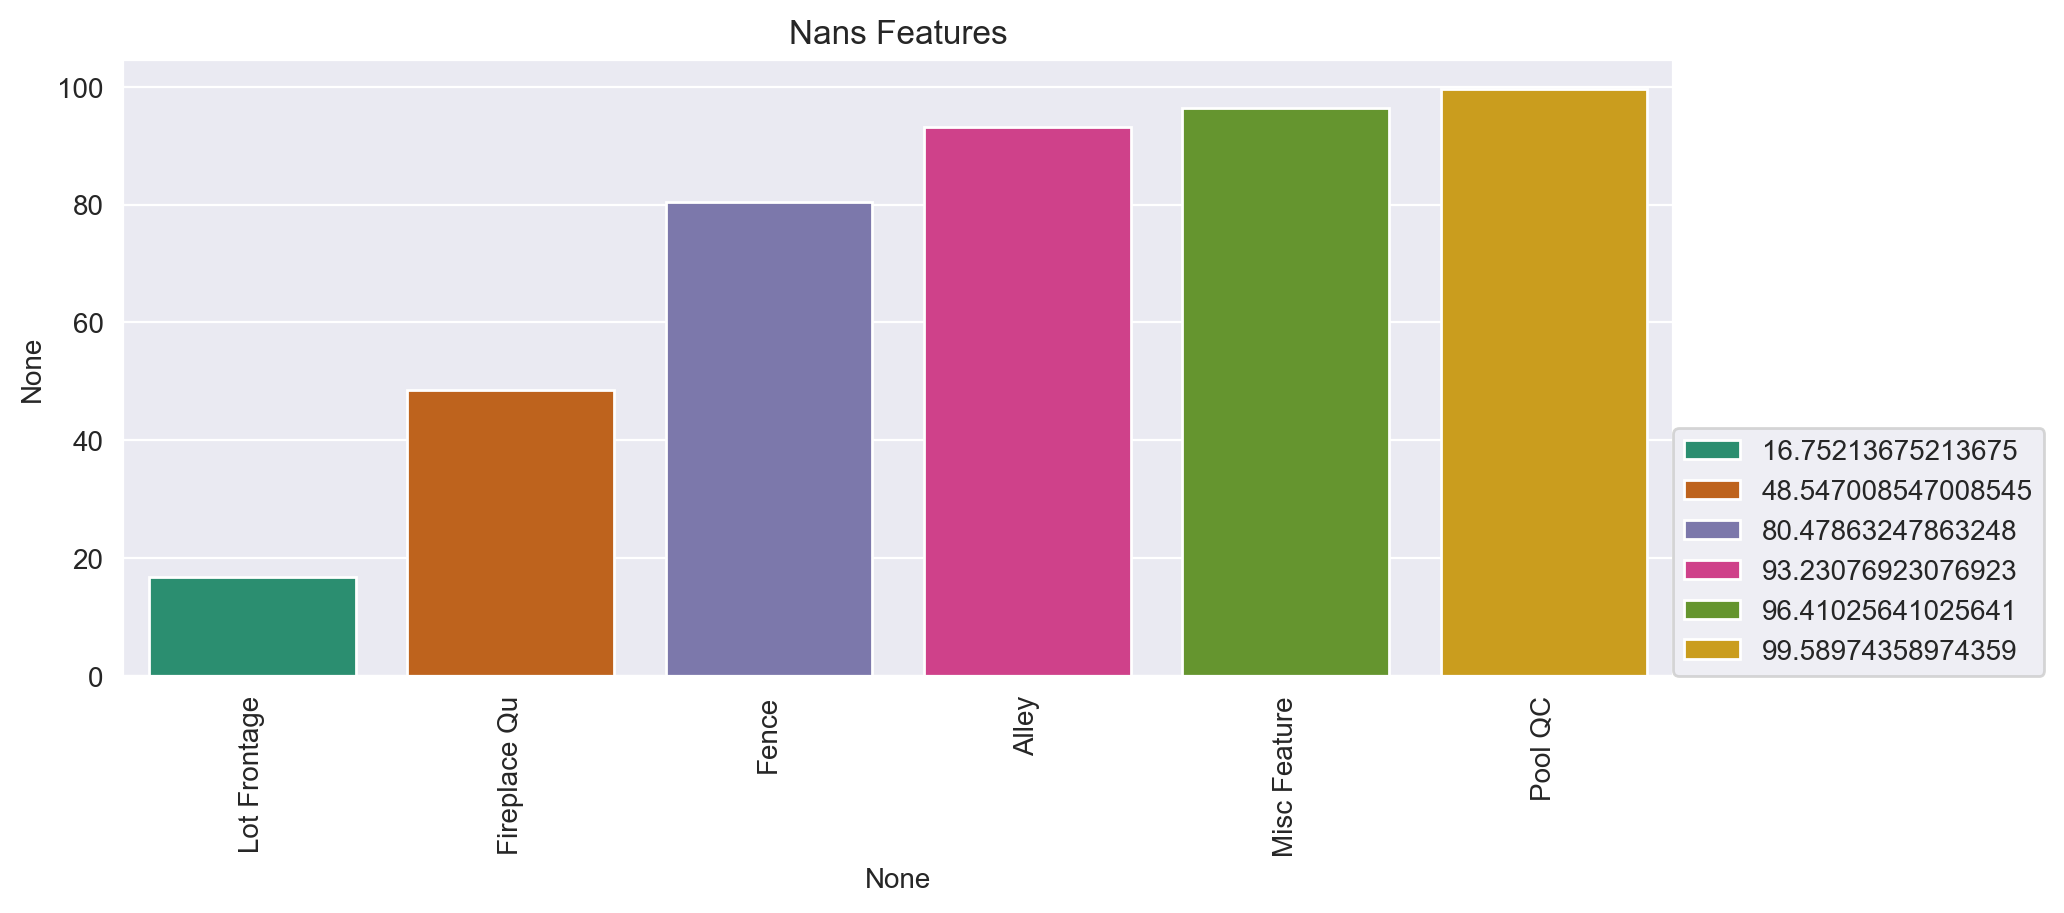

In [121]:
nans = missing_percentage(df)
display_nans(nans)


In [122]:
#thos features are exceeded 50% of nan so will drop it 
not_needed_features = ['Fence','Alley','Misc Feature','Pool QC']
df = df.drop(not_needed_features,axis=1)

In [123]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


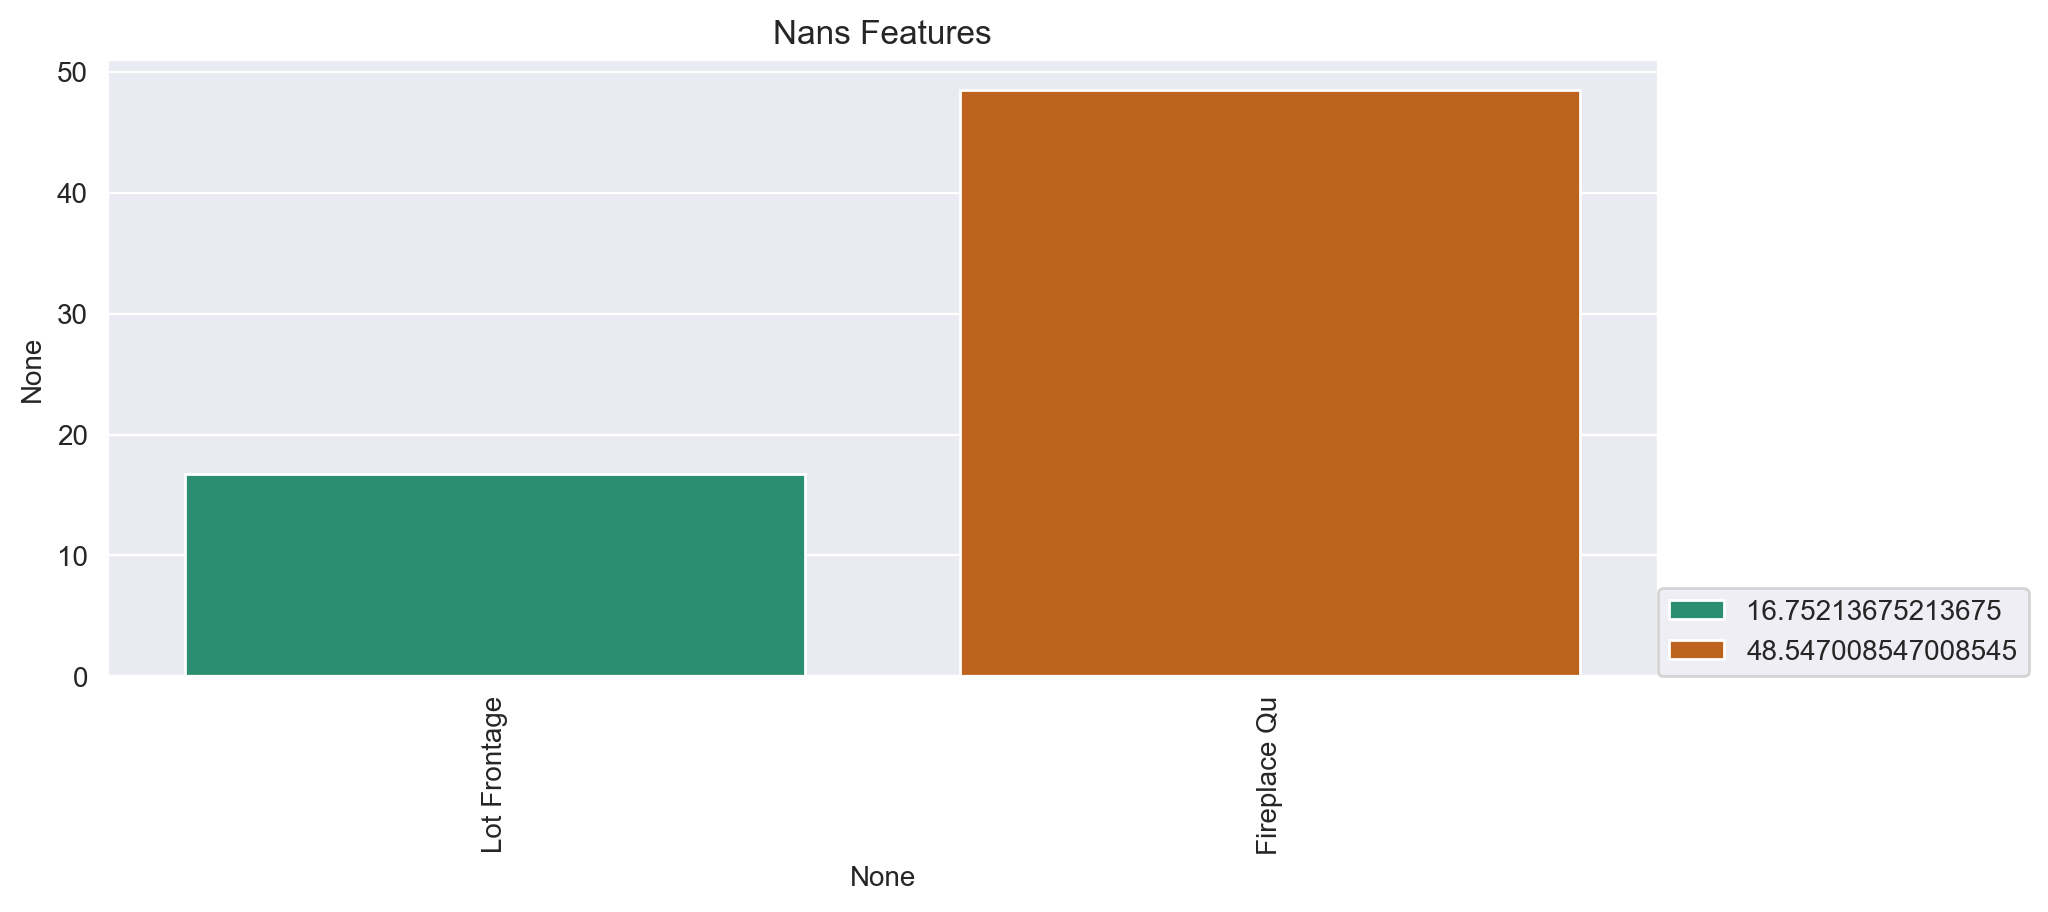

In [124]:
nans = missing_percentage(df)
display_nans(nans)

In [125]:
#now both those features can not be dropped or fill it directly first need to study it carefully 
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [126]:
#after explore the dataset docs when it nan it means no fireplace so let's fill it by none
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')   


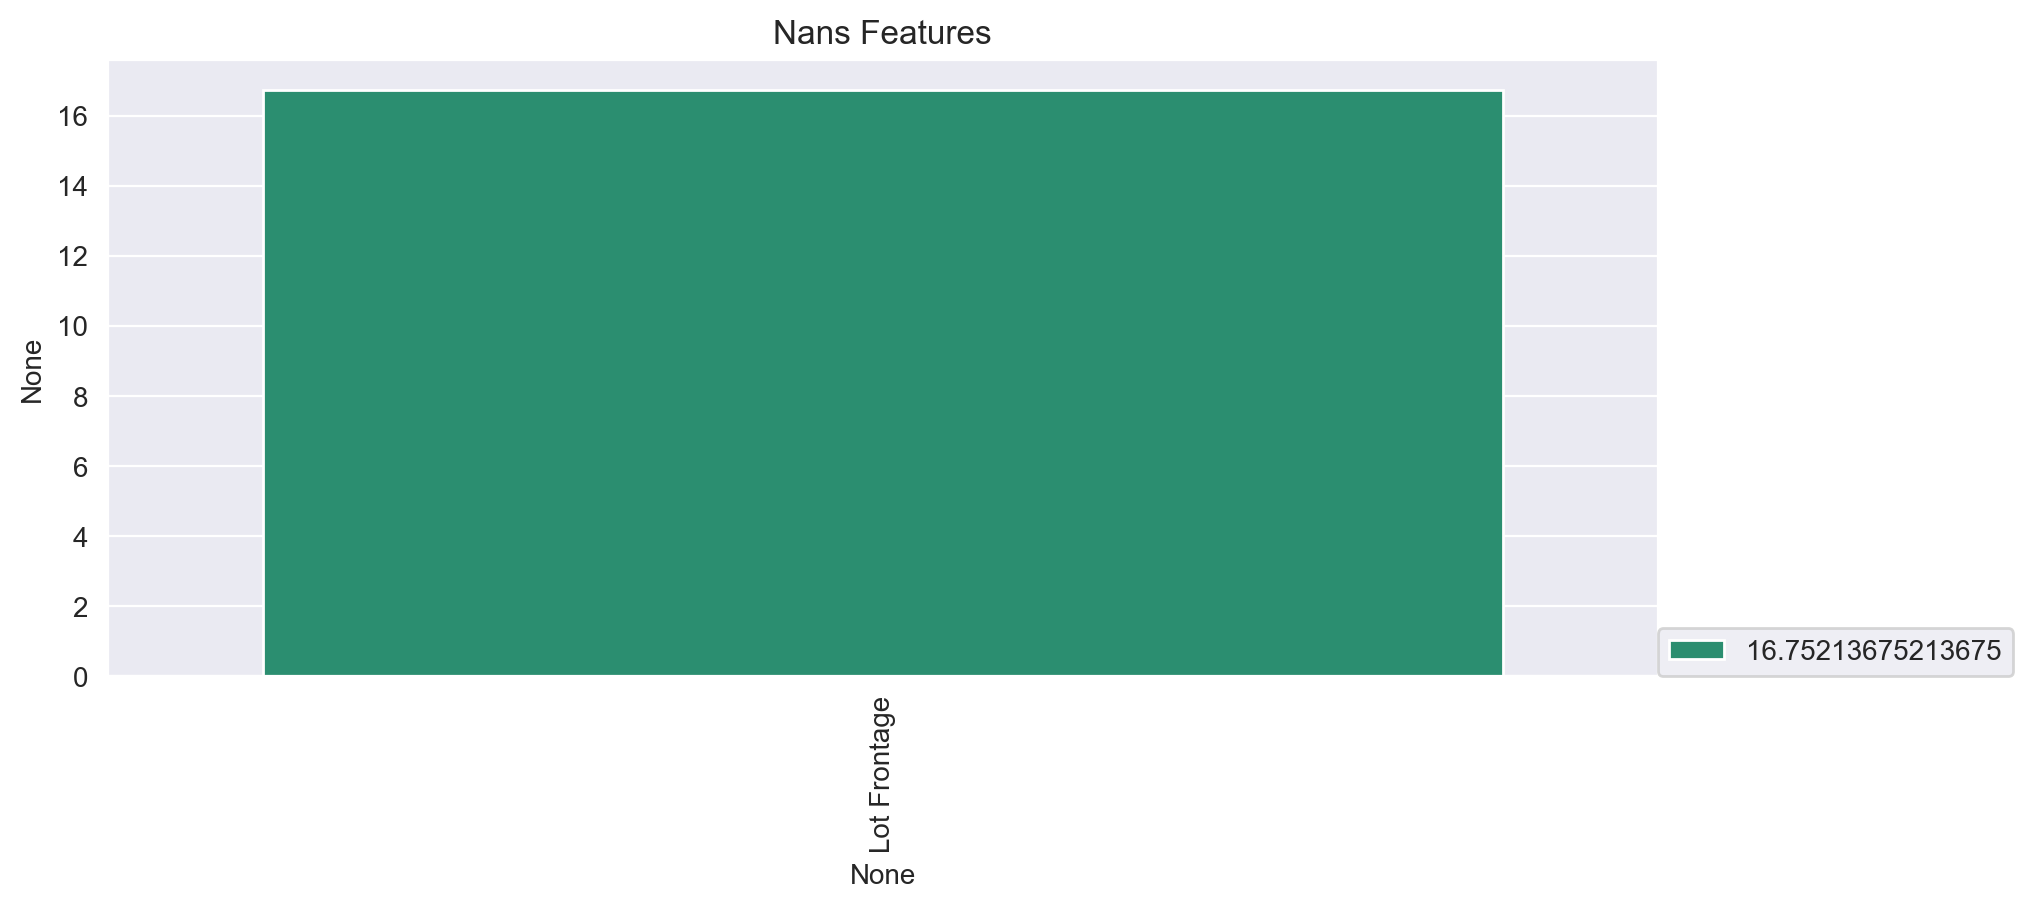

In [127]:
nans = missing_percentage(df)
display_nans(nans)

In [129]:
#now this data has no direct explanation in docs so let's divide it based on another feature 
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [131]:
#now used transform method to fill nan values with this means values grouped by Neighborhood
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

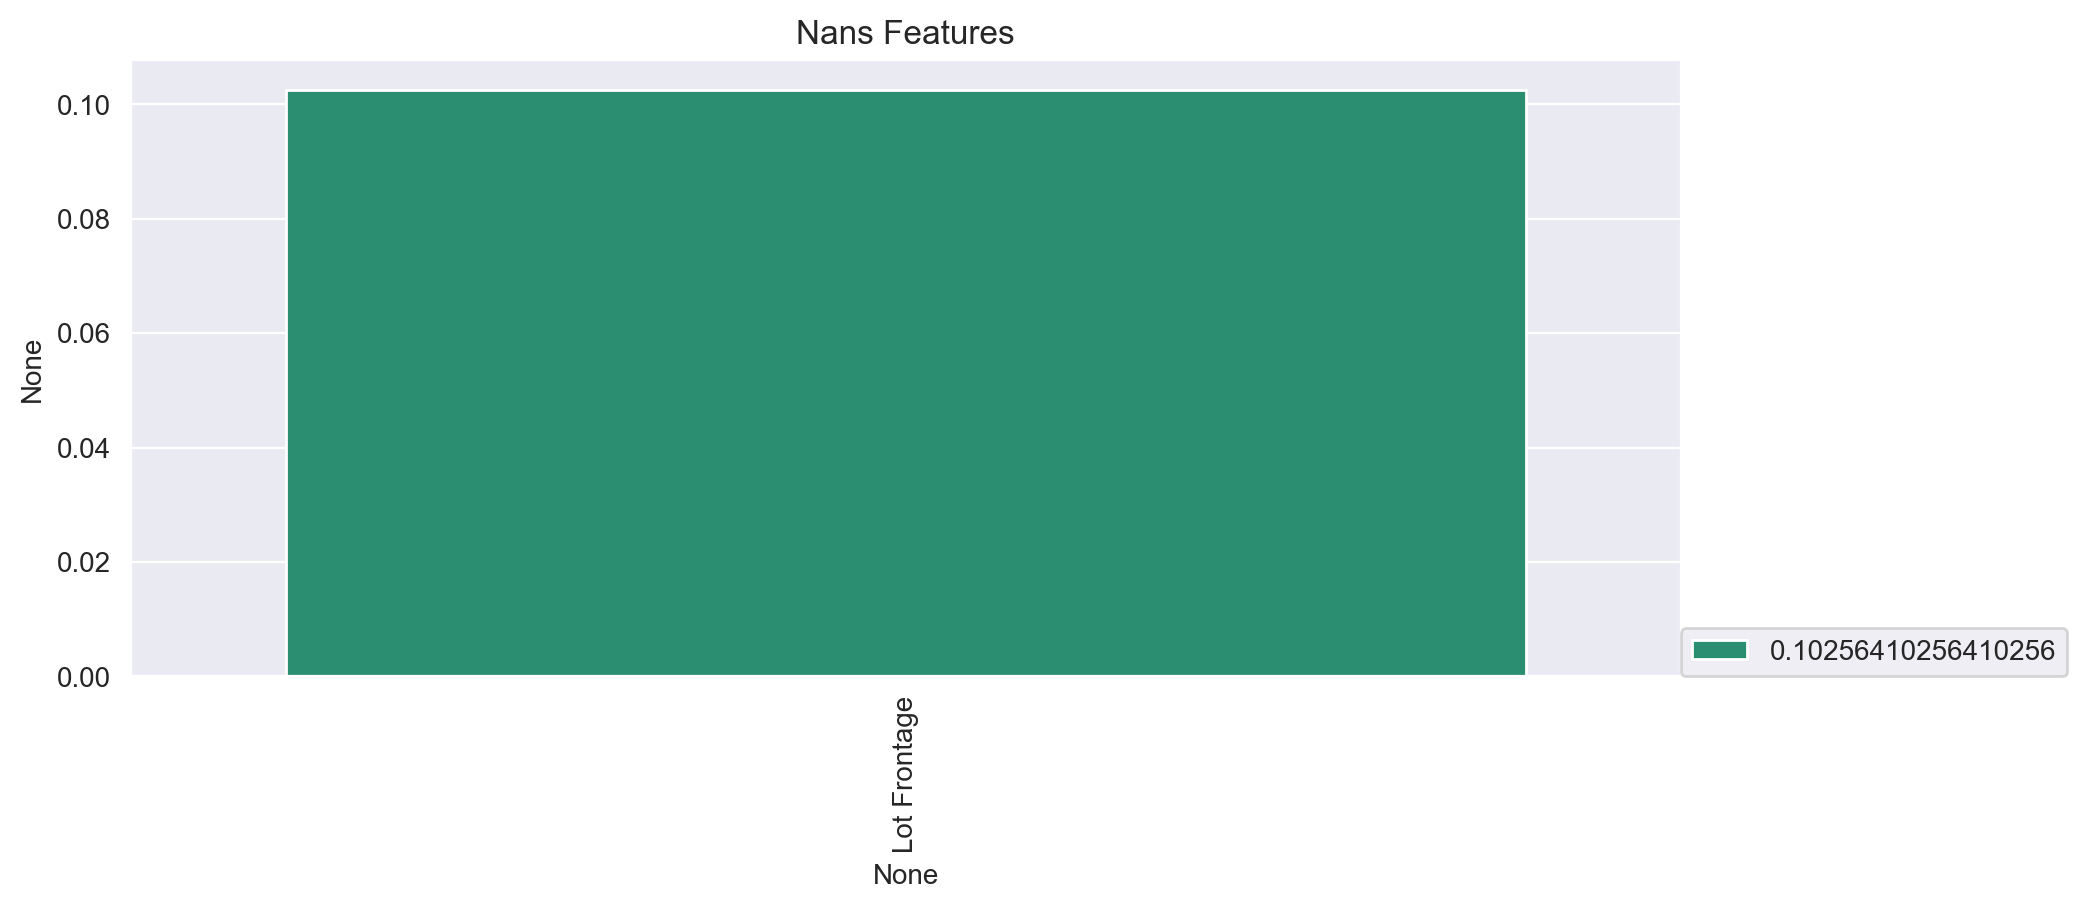

In [132]:
nans = missing_percentage(df)
display_nans(nans)

In [134]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

# Now handle categorical features 

In [136]:
object_cols = df.select_dtypes(include=['object'])
numeric_cols = df.select_dtypes(exclude=['object'])

In [138]:
object_cols

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


## Use built-in method with pandas to encode it

In [145]:
dummies = pd.get_dummies(object_cols,drop_first=True,dtype=int)

In [146]:
dummies

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [147]:
final_df = pd.concat([numeric_cols,dummies],axis=1)

In [148]:
final_df

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,20,141.000000,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,20,80.000000,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,20,81.000000,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,60,74.000000,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,37.000000,7937,6,6,1984,1984,0.0,819.0,...,0,0,0,0,1,0,0,0,1,0
2926,923276100,20,75.144444,8885,5,5,1983,1983,0.0,301.0,...,0,0,0,0,1,0,0,0,1,0
2927,923400125,85,62.000000,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0
2928,924100070,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,...,0,0,0,0,1,0,0,0,1,0


# Now after apply alot operations on features let's built the model

In [205]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [206]:
from sklearn.model_selection import train_test_split,GridSearchCV


## Split data into dataset for train and one for test model  ##

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Scale the data before use it 

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
scaler = StandardScaler() 

In [210]:
#scale data base on train data 
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


## Use ElasticNet model to train the model 

In [211]:
from sklearn.linear_model import ElasticNet

In [212]:
final_model = ElasticNet(max_iter=100000)

# Define paramGrid to make GridSearch to Find optimal hyperparameters for ElasticNet Model (alpha,l1_ratio)

In [173]:
#the reason behind use grid search instead of cross_validate or Cross_val_Scor is ,that the Elastic net has more than one hyperparameter
param_grid = {
    'alpha':[0.1,1,5,10,50,100,150,155,160,200,300,405],
    'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]
}
grid_search = GridSearchCV(final_model,param_grid= param_grid,cv=5,verbose=1,scoring='neg_mean_squared_error' )

In [174]:
grid_search.fit(X_train_std,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\3ashry\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.051e+10, tolerance: 1.199e+09
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100, 150, 155, 160, 200,
                                   300, 405],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [213]:
grid_search.best_estimator_

ElasticNet(alpha=200, l1_ratio=1, max_iter=100000)

## Convert the result of the gridSearch to explore differences between difference alphas and l1_ratios

In [214]:
results = pd.DataFrame(grid_search.cv_results_)

In [215]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.125250,0.032177,0.000000,0.000000,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-6.069607e+08,-6.600629e+08,-4.021663e+08,-4.495950e+08,-5.758927e+08,-5.389355e+08,9.731664e+07,18
1,0.192416,0.070153,0.001903,0.003805,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-6.064824e+08,-6.378478e+08,-3.946120e+08,-4.452817e+08,-5.724968e+08,-5.313441e+08,9.464116e+07,14
2,0.225905,0.027273,0.000000,0.000000,0.1,0.70,"{'alpha': 0.1, 'l1_ratio': 0.7}",-6.095024e+08,-6.278007e+08,-3.900838e+08,-4.439876e+08,-5.725035e+08,-5.287756e+08,9.450857e+07,8
3,0.778275,0.045298,0.000000,0.000000,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-6.262397e+08,-6.272946e+08,-3.821129e+08,-4.433108e+08,-5.755451e+08,-5.309006e+08,1.001841e+08,11
4,2.223609,0.225752,0.000000,0.000000,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-6.366954e+08,-6.431930e+08,-3.797872e+08,-4.389080e+08,-5.774671e+08,-5.352101e+08,1.069351e+08,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.006250,0.007655,0.000703,0.001406,405.0,0.50,"{'alpha': 405, 'l1_ratio': 0.5}",-5.633567e+09,-7.327117e+09,-4.964087e+09,-5.042380e+09,-6.134283e+09,-5.820287e+09,8.651257e+08,70
68,0.009377,0.007657,0.000000,0.000000,405.0,0.70,"{'alpha': 405, 'l1_ratio': 0.7}",-5.265529e+09,-6.905963e+09,-4.617134e+09,-4.697087e+09,-5.733039e+09,-5.443751e+09,8.359805e+08,64
69,0.012583,0.006293,0.000000,0.000000,405.0,0.95,"{'alpha': 405, 'l1_ratio': 0.95}",-2.985578e+09,-4.197608e+09,-2.498818e+09,-2.592870e+09,-3.205442e+09,-3.096063e+09,6.078614e+08,49
70,0.015606,0.000047,0.000000,0.000000,405.0,0.99,"{'alpha': 405, 'l1_ratio': 0.99}",-1.308428e+09,-1.961585e+09,-9.934933e+08,-1.094506e+09,-1.313009e+09,-1.334204e+09,3.371228e+08,38


## Check the model accuracy 

In [216]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = grid_search.predict(X_test_std)
MAE =  mean_absolute_error(y_test,predictions)

In [217]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
RMSE

22214.65251198656

## Just a little compare between the sale price and the RMSE or MAE to find is it worth all this or not and is it efficient

In [218]:
np.mean(final_df['SalePrice'])

180815.53743589742

# the diff between 180815 and 22214 is not so bad i think


## Exclude test dataset 

In [219]:
test_dataset = pd.concat([X_test,y_test],axis=1)

In [220]:
test_dataset.to_csv('./datasets/test/test_dataset.csv',index=False)

# deploy model local using joblib 

In [221]:
from joblib import dump,load

In [222]:
dump(grid_search,'./model/final_model.joblib')

['./model/final_model.joblib']

# Test the model 

In [223]:
model = load('./model/final_model.joblib')
test_dataset = pd.read_csv('./datasets/test/test_dataset.csv')

In [224]:
test_dataset.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,532378240,20,74.55102,6173,5,6,1967,1967,75.0,599.0,...,0,0,0,1,0,0,0,1,0,125500
1,908154040,20,86.00000,13286,9,5,2007,2008,340.0,1234.0,...,0,0,0,1,0,0,0,1,0,320000
2,528458090,60,81.00000,10411,5,5,2007,2007,0.0,0.0,...,1,0,0,0,0,0,0,0,1,212109
3,528240130,60,63.00000,8577,7,5,2004,2004,0.0,0.0,...,0,0,0,1,0,0,0,1,0,185088
4,909250210,50,60.00000,6000,5,5,1926,1950,0.0,0.0,...,0,0,0,1,0,0,0,1,0,102000


In [225]:
def split_normalize_data(df,split_size=0.2,rand_state=101,scaler_type=StandardScaler):
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
    scaler = scaler_type()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    return X_train_std,X_test_std,y_train,y_test
    

In [226]:
def normalize_test_data(df,scaler_type=StandardScaler):
    scaler = scaler_type()
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    scaler.fit(X)
    return scaler.fit_transform(X),y

In [228]:
X,y = normalize_test_data(test_dataset)
X.shape

(585, 260)

In [229]:
def predict_calc_errors(X,y):
    predictions = model.predict(X)
    return predictions, np.sqrt(mean_squared_error(y,predictions)),mean_absolute_error(y,predictions)

In [230]:
preds, rmse, mae = predict_calc_errors(X,y)

In [232]:
preds[0]

110243.02286691887